In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
x,y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=40)


In [2]:
x

array([[-2.57925122,  1.75161627,  0.32694036, ..., -3.78029108,
        -1.52543511, -2.97273256],
       [ 0.44053016,  1.98286808,  0.56963836, ..., -2.0453645 ,
        -2.21941253,  0.77335006],
       [ 1.48994726, -0.31330531,  2.47177153, ..., -0.61297368,
        -0.7021682 ,  2.81847188],
       ...,
       [-2.25612054, -0.10090614, -0.49357235, ...,  1.67924742,
        -1.2200096 ,  0.31284709],
       [-0.31919195, -0.54293713,  0.69318286, ..., -1.5572645 ,
         0.36420099, -0.72424523],
       [ 2.08438828,  0.5398287 ,  2.26286744, ..., -1.36072339,
        -1.35911055,  2.99380962]])

In [3]:
y

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_pred)}')
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100.0}%')
print(f'Classification Report : \n{classification_report(y_test, y_pred)}')

Confusion Matrix : 
[[88  4]
 [ 9 99]]
Accuracy Score : 93.5%
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        92
           1       0.96      0.92      0.94       108

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



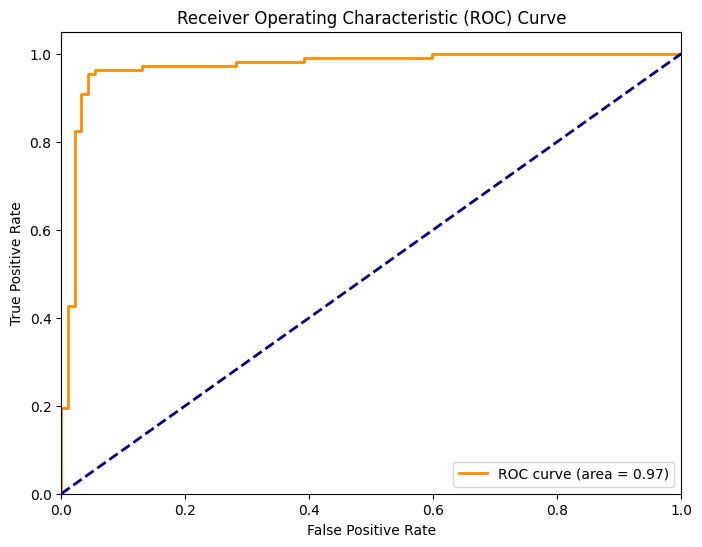

In [13]:
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)'% roc_auc )  # % roc_auc Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()  # Show the plot

### Precesion Recall Trade Off (Using Custome Cutoff).

In [15]:
import numpy as np
thresholds = np.linspace(0,1,100)

In [16]:
from sklearn.metrics import precision_score, recall_score
precesion, recall,accuracy = [], [], []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precesion.append(precision_score(y_test, y_pred_threshold))
    recall.append(recall_score(y_test, y_pred_threshold))
    accuracy.append(accuracy_score(y_test, y_pred_threshold))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


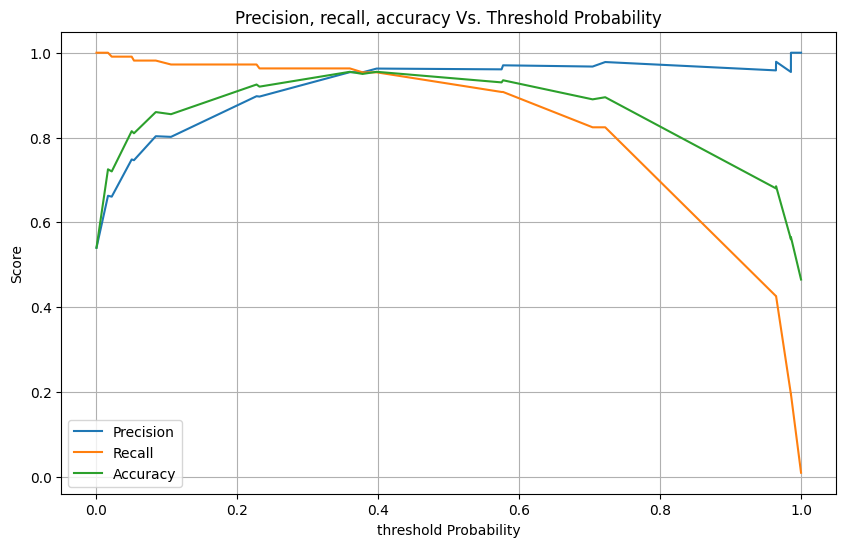

In [18]:
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
plt.plot(thresholds, precesion, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, accuracy, label="Accuracy")
plt.xlabel('threshold Probability')
plt.ylabel('Score')
plt.title('Precision, recall, accuracy Vs. Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
new_pred_level = np.where(y_pred_proba>0.42,1,0)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(f'Confusion Matrix : \n{confusion_matrix(y_test, new_pred_level)}')
print(f'Accuracy Score : {accuracy_score(y_test, new_pred_level)*100.0}%')
print(f'Classification Report : \n{classification_report(y_test, new_pred_level)}')

Confusion Matrix : 
[[ 88   4]
 [  6 102]]
Accuracy Score : 95.0%
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        92
           1       0.96      0.94      0.95       108

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

